# Analysis and insights Python script: Solar power plant generation analysis
## Part 2: Data transformation

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:15.2f}'.format

## Load data

In [2]:
df = pd.read_pickle("data/df.pickle")
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambient,t_module,irradiance
timestamp,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136472 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   plant        136472 non-null  object 
 1   inverter_id  136472 non-null  object 
 2   kw_dc        136472 non-null  float64
 3   kw_ac        136472 non-null  float64
 4   kw_day       136472 non-null  float64
 5   kw_total     136472 non-null  float64
 6   sensor_id    136472 non-null  object 
 7   t_ambient    136472 non-null  float64
 8   t_module     136472 non-null  float64
 9   irradiance   136472 non-null  float64
dtypes: float64(7), object(3)
memory usage: 34.8 MB


## Create variables

We shall begin with substracting the date components and incorporate them to the dataframe as new variables.

In [4]:
def date_components(df):
    month = df.index.month
    day = df.index.day
    hour = df.index.hour
    minute = df.index.minute

    return pd.DataFrame({"month":month,"day":day,"hour":hour,"minute":minute})

In [5]:
df = pd.concat([df.reset_index(),date_components(df)], axis=1).set_index("timestamp")
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambient,t_module,irradiance,month,day,hour,minute
timestamp,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45


We are going to create the efficiency variable, which consists of the amount (in percentage) of DC power converted to AC power correctly.

We need to be careful because there are going to be DC values of zero. Having a zero in the denominator will return a null value. But in this case it should be a zero of efficiency. Then:

In [6]:
def inverter_efficiency(AC,DC):
    temp = AC / DC * 100
    return temp.fillna(0)

In [7]:
df["efficiency"] = inverter_efficiency(df["kw_ac"],df["kw_dc"])

Check that there are no nulls from the efficiency variable creation.

In [8]:
df["efficiency"].isna().sum()

0

Let's visualise an overview of the efficiency.

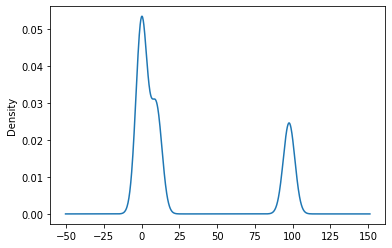

In [9]:
df["efficiency"].plot.kde();

Here we can clearly identify two different groups of efficiency. One of them with an efficiency between 0 and 10% and the other around 100%.

We will analyse this later in the analysis script.

## Rearange dataframe

Before starting the actual analysis of the data it is important to remember how the process of obtaining and delivering the solar power works. We start from solar irradiance directly hitting on the solar modules, then converting the power to DC, then de inverters transform it into AC, and finally the power is delivered to the grid.

To make things easier to analyse, let's rearange the variables in the dataframe in that order.

In [10]:
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambient,t_module,irradiance,month,day,hour,minute,efficiency
timestamp,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,5,15,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,6,17,23,45,0.00


In [15]:
order = ["plant","month","day","hour","minute","sensor_id","irradiance","t_ambient",
            "t_module","inverter_id","kw_dc","kw_ac","efficiency","kw_day","kw_total"]
df = df[order]
df

,plant,month,day,hour,minute,sensor_id,irradiance,t_ambient,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total
timestamp,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00


## Daily dataframe

The current dataframe has data every 15 minutes for every inverter which might be too downsampled for some types of analysis we may want to run later.

For that reason we are going to create another dataframe. It is going to be resampled to daily level and all variables are going to be aggregated by some key metrics that we are going to define in the next step.

In [16]:
df.head()

,plant,month,day,hour,minute,sensor_id,irradiance,t_ambient,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total
timestamp,,,,,,,,,,,,,,,
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00


We are going to group by plant and inverter and resample to daily level. Then, we are going to aggregate each variable by some metrics. 

For irradiance, ambient temperature, module temperature and efficiency we want to aggregate by the daily minimum, mean and maximum values.

In the case of DC and AC power, same metrics but including also the sum for that day. And for the daily kW and total kW, the maximum value for that day.

In [20]:
df_daily = df.groupby(["plant","inverter_id"]).resample("D") \
        .agg({"irradiance":[min,np.mean,max],
              "t_ambient":[min,np.mean,max],
              "t_module":[min,np.mean,max],
              "kw_dc":[min,np.mean,max,sum],
              "kw_ac":[min,np.mean,max,sum],
              "efficiency":[min,np.mean,max],
              "kw_day":[max],
              "kw_total":[max]})
df_daily

irradiance                  \
                                             min            mean   
plant inverter_id     timestamp                                    
p1    1BY6WEcLGh8j5v7 2020-05-15            0.00            0.20   
                      2020-05-16            0.00            0.21   
                      2020-05-17            0.00            0.24   
                      2020-05-18            0.00            0.16   
                      2020-05-19            0.00            0.19   
...                                          ...             ...   
p2    xoJJ8DcxJEcupym 2020-06-13            0.00            0.22   
                      2020-06-14            0.00            0.23   
                      2020-06-15            0.00            0.19   
                      2020-06-16            0.00            0.17   
                      2020-06-17            0.00            0.12   

                                                       t_ambient  \
                                             max             min   
plant inverter_id     timestamp                                    
p1    1BY6WEcLGh8j5v7 2020-05-15            0.89           22.04   
                      2020-05-16            0.81           21.50   
                      2020-05-17            1.00           21.21   
                      2020-05-18            0.97           20.96   
                      2020-05-19            0.84           22.39   
...                                          ...             ...   
p2    xoJJ8DcxJEcupym 2020-06-13            0.93           22.20   
                      2020-06-14            0.92           23.65   
                      2020-06-15            0.83           24.00   
                      2020-06-16            0.77           23.63   
                      2020-06-17            0.58           22.55   

                                                                  \
                                            mean             max   
plant inverter_id     timestamp                                    
p1    1BY6WEcLGh8j5v7 2020-05-15           27.43           34.43   
                      2020-05-16           26.78           32.52   
                      2020-05-17           26.69           35.25   
                      2020-05-18           23.85           28.37   
                      2020-05-19           25.34           30.37   
...                                          ...             ...   
p2    xoJJ8DcxJEcupym 2020-06-13           26.12           31.91   
                      2020-06-14           27.02           32.96   
                      2020-06-15           26.56           31.61   
                      2020-06-16           26.37           30.83   
                      2020-06-17           24.85           29.04   

                                        t_module                  \
                                             min            mean   
plant inverter_id     timestamp                                    
p1    1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                      2020-05-16           19.59           31.86   
                      2020-05-17           20.38           32.74   
                      2020-05-18           19.48           27.81   
                      2020-05-19           20.06           29.73   
...                                          ...             ...   
p2    xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                      2020-06-14           22.12           31.59   
                      2020-06-15           23.00           30.00   
                      2020-06-16           22.56           29.59   
                      2020-06-17           21.91           26.67   

                                                           kw_dc  ...  \
                                             max             min  ...   
plant inverter_id     timestamp                                   ...   
p1    1

The daily dataframe has been generated with multi index at column and row level. We can remove it with df.columns.to_flat_index().

This just gives as the tuples, but we can join them later to make the new variables' names.

In [22]:
tuples = df_daily.columns.to_flat_index()
tuples

Index([ ('irradiance', 'min'), ('irradiance', 'mean'),  ('irradiance', 'max'),
         ('t_ambient', 'min'),  ('t_ambient', 'mean'),   ('t_ambient', 'max'),
          ('t_module', 'min'),   ('t_module', 'mean'),    ('t_module', 'max'),
             ('kw_dc', 'min'),      ('kw_dc', 'mean'),       ('kw_dc', 'max'),
             ('kw_dc', 'sum'),       ('kw_ac', 'min'),      ('kw_ac', 'mean'),
             ('kw_ac', 'max'),       ('kw_ac', 'sum'),  ('efficiency', 'min'),
       ('efficiency', 'mean'),  ('efficiency', 'max'),      ('kw_day', 'max'),
          ('kw_total', 'max')],
      dtype='object')

In [27]:
df_daily.columns = ["_".join(i) for i in tuples]
df_daily

irradiance_min  irradiance_mean  \
plant inverter_id     timestamp                                     
p1    1BY6WEcLGh8j5v7 2020-05-15            0.00             0.20   
                      2020-05-16            0.00             0.21   
                      2020-05-17            0.00             0.24   
                      2020-05-18            0.00             0.16   
                      2020-05-19            0.00             0.19   
...                                          ...              ...   
p2    xoJJ8DcxJEcupym 2020-06-13            0.00             0.22   
                      2020-06-14            0.00             0.23   
                      2020-06-15            0.00             0.19   
                      2020-06-16            0.00             0.17   
                      2020-06-17            0.00             0.12   

                                  irradiance_max   t_ambient_min  \
plant inverter_id     timestamp                                    
p1    1BY6WEcLGh8j5v7 2020-05-15            0.89           22.04   
                      2020-05-16            0.81           21.50   
                      2020-05-17            1.00           21.21   
                      2020-05-18            0.97           20.96   
                      2020-05-19            0.84           22.39   
...                                          ...             ...   
p2    xoJJ8DcxJEcupym 2020-06-13            0.93           22.20   
                      2020-06-14            0.92           23.65   
                      2020-06-15            0.83           24.00   
                      2020-06-16            0.77           23.63   
                      2020-06-17            0.58           22.55   

                                  t_ambient_mean   t_ambient_max  \
plant inverter_id     timestamp                                    
p1    1BY6WEcLGh8j5v7 2020-05-15           27.43           34.43   
                      2020-05-16           26.78           32.52   
                      2020-05-17           26.69           35.25   
                      2020-05-18           23.85           28.37   
                      2020-05-19           25.34           30.37   
...                                          ...             ...   
p2    xoJJ8DcxJEcupym 2020-06-13           26.12           31.91   
                      2020-06-14           27.02           32.96   
                      2020-06-15           26.56           31.61   
                      2020-06-16           26.37           30.83   
                      2020-06-17           24.85           29.04   

                                    t_module_min   t_module_mean  \
plant inverter_id     timestamp                                    
p1    1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                      2020-05-16           19.59           31.86   
                      2020-05-17           20.38           32.74   
                      2020-05-18           19.48           27.81   
                      2020-05-19           20.06           29.73   
...                                          ...             ...   
p2    xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                      2020-06-14           22.12           31.59   
                      2020-06-15           23.00           30.00   
                      2020-06-16           22.56           29.59   
                      2020-06-17           21.91           26.67   

                                    t_module_max       kw_dc_min  ...  \
plant inverter_id     timestamp                                   ...   
p1    1BY6WEcLGh8j5v7 2020-05-15           55.03            0.00  ...   
                      2020-05-16           54.23            0.00  ...   
                      2020-05-17           63.15            0.00  ...   
                      2020-05-18           53.94            0.00  ...   
                      2020-05-19           

Finally we just need to leave the timestamp and the index and plant and inverter_id as variables.

In [32]:
df_daily = df_daily.reset_index().set_index("timestamp")
df_daily

,plant,inverter_id,irradiance_min,irradiance_mean,irradiance_max,t_ambient_min,t_ambient_mean,t_ambient_max,t_module_min,t_module_mean,...,kw_dc_sum,kw_ac_min,kw_ac_mean,kw_ac_max,kw_ac_sum,efficiency_min,efficiency_mean,efficiency_max,kw_day_max,kw_total_max
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.20,0.89,22.04,27.43,34.43,20.29,32.58,...,235340.70,0.00,247.81,1039.35,23046.55,0.00,5.26,9.82,5754.00,6265313.00
2020-05-16,p1,1BY6WEcLGh8j5v7,0.00,0.21,0.81,21.50,26.78,32.52,19.59,31.86,...,256629.88,0.00,285.51,1095.29,25124.49,0.00,5.56,9.83,6292.00,6271605.00
2020-05-17,p1,1BY6WEcLGh8j5v7,0.00,0.24,1.00,21.21,26.69,35.25,20.38,32.74,...,288039.82,0.00,293.47,1114.81,28172.85,0.00,4.99,9.82,7045.00,6278650.00
2020-05-18,p1,1BY6WEcLGh8j5v7,0.00,0.16,0.97,20.96,23.85,28.37,19.48,27.81,...,204030.30,0.00,208.03,1193.63,19970.51,0.00,4.99,9.83,4998.00,6283648.00
2020-05-19,p1,1BY6WEcLGh8j5v7,0.00,0.19,0.84,22.39,25.34,30.37,20.06,29.73,...,232277.27,0.00,244.53,1059.80,22741.18,0.00,4.63,9.83,6449.00,6290097.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,p2,xoJJ8DcxJEcupym,0.00,0.22,0.93,22.20,26.12,31.91,20.88,30.39,...,27443.74,0.00,279.59,1239.95,26840.58,0.00,51.91,98.29,6632.00,209312200.00
2020-06-14,p2,xoJJ8DcxJEcupym,0.00,0.23,0.92,23.65,27.02,32.96,22.12,31.59,...,30768.78,0.00,313.43,1328.21,30088.97,0.00,51.94,99.92,7268.00,209319687.00
2020-06-15,p2,xoJJ8DcxJEcupym,0.00,0.19,0.83,24.00,26.56,31.61,23.00,30.00,...,25597.24,0.00,260.93,1256.67,25049.49,0.00,52.94,98.27,7412.67,209325949.00


With this we have the dataframes ready to be analysed at hour and daily level.

Let's save them as pickle objects again.

In [ ]:
df.to_pickle("data/df.pickle")
df_daily.to_pickle("data/df_daily.pickle")